<a href="https://colab.research.google.com/github/oxcracx/90daysofcybersecurity/blob/main/m_learn01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PLaying around with Collab.**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data-sets/earthquake_data_tsunami.csv')
display(df.head())

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


## Explore the data

Let's take a look at the first few rows of the DataFrame and check the data types of the columns to get an overview of the dataset.

## Count earthquakes by year

Let's count how many earthquakes occurred in each year in the dataset.

In [ ]:
# Display the head of the DataFrame
display(df.head())

# Display the column names and their data types
display(df.info())

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


None

In [ ]:
earthquakes_by_year = df['Year'].value_counts().sort_index()
display(earthquakes_by_year)

,count
Year,
2001,28
2002,25
2003,31
2004,32
2005,28
2006,26
2007,37
2008,25
2009,26


## Visualize Earthquake Locations on a Map

Let's visualize the locations of the earthquakes on an interactive map using `Folium`.

## Bar plot of earthquakes by year

Now, let's visualize the number of earthquakes per year using a bar plot.

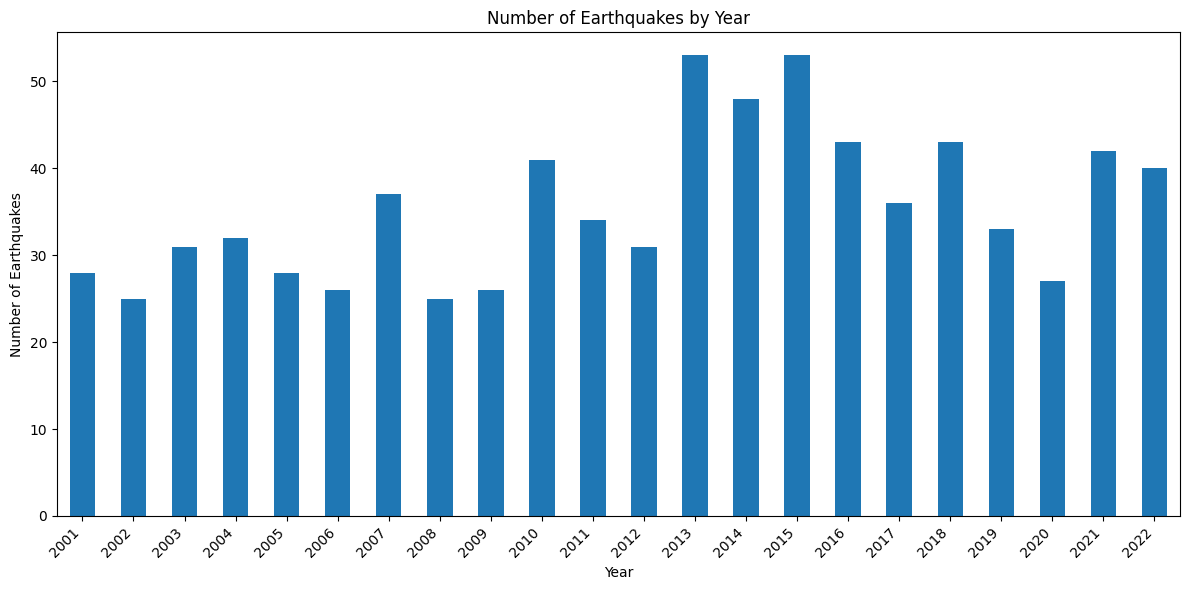

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
earthquakes_by_year.plot(kind='bar')
plt.title('Number of Earthquakes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import folium

# Create a base map centered around a general area where earthquakes occur frequently
# You can adjust the location and zoom level as needed
m = folium.Map(location=[0, 0], zoom_start=2)

# Add markers for each earthquake location
for index, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Magnitude: {row['magnitude']}, Depth: {row['depth']}"
    ).add_to(m)

# Display the map
display(m)